# Investigate TMDb Movie Database

### The primary goal of this project is to practice going through the general data analysis process in investigating a dataset from The Movie Database (TMDb)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this project, I have selected a dataset containing information about 10,000 movies from The Movie Database (TMDb). The data contains basic movie information, such as cast, keywords, production companies, runtime, etc and some movie metrics that show how popular the movies are: popularity, user ratings, revenue data. The movie dataset contains data for movies released in 1960 until 2015.

Here are some questions that I plan to answer using the dataset:
>1. How is the trend of the number of movies released year by year?
>2. Which movie companies have been successful in collecting more revenues?
>3. Which genres are more popular from year to year?
>4. Does specific actor/actress contribute to more success?
>5. Does the release month affect the popularity of the movie?

In [1]:
# Import all of the packages used in this project.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

In this section of the report, I loaded in the data, checked for cleanliness, and then cleaned my dataset for analysis. I have included all the necessary details and justifications on the steps I took.

### General Properties

In [2]:
# Load my data and print out a few lines
movie_data = pd.read_csv('tmdb-movies.csv')
movie_data.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


The data itself can be considered neat, except some columns (cast, genres, and production companies have multiple values separated by '|' for each movie). 

In [3]:
# Perform operations to inspect data types and look for instances of missing or possibly errant data.
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [4]:
# Check if there is any row duplicated in the dataset
sum(movie_data.duplicated())

1

In [5]:
# Drop the duplicate row so it will not be counted twice in the analysis
movie_data.drop_duplicates(inplace = True)

I have decided to drop several extraneous columns that are not going to be used in my analysis; I will use the adjusted revenue column in order to standardize the revenue values.

In [6]:
# Drop extraneous columns (not useful columns in this analysis)
movie_data.drop(['imdb_id', 'tagline', 'homepage', 'overview', 'keywords', 'budget', 'revenue'], axis = 1, inplace = True)
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 14 columns):
id                      10865 non-null int64
popularity              10865 non-null float64
original_title          10865 non-null object
cast                    10789 non-null object
director                10821 non-null object
runtime                 10865 non-null int64
genres                  10842 non-null object
production_companies    9835 non-null object
release_date            10865 non-null object
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
budget_adj              10865 non-null float64
revenue_adj             10865 non-null float64
dtypes: float64(4), int64(4), object(6)
memory usage: 1.2+ MB


In [7]:
# Drop any rows that contain missing values
movie_data.dropna(inplace = True)
movie_data.head(1)

,id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


### Basic Data Wrangling Summary:
> 1. Drop duplicate row
> 2. Remove extraneous columns
> 3. Drop rows that contain missing values

## Cleaning Data

In order to answer my questions, I will trim the cast data into only 1 value (the first cast name for each movie: the main actor/actress playing the movie). I will do the same for the production companies column (keep only the main production company) and rename the column to 'production_company'.

For the genres column, I will split the row with multiple genres into separate rows containing only 1 genre, for example a movie with 4 genres: Adventure|Science|Fiction|Thriller will be splitted into 4 rows, with the first row containing genre Adventure, second row Science, and so on.

The last data cleaning activity I will do is to extract the release month for each movie from the release_date column.

### Cleaning Data (Trim Cast Name and Production Company)

In [8]:
# Extract the first entry in the cast and production companies column
split_columns = ['cast', 'production_companies']
for c in split_columns:
    movie_data[c] = movie_data[c].apply(lambda x: x.split("|")[0])

# Rename production_companies column
movie_data = movie_data.rename(columns = {'production_companies': 'production_company'})

movie_data.head(1)

,id,popularity,original_title,cast,director,runtime,genres,production_company,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,Jurassic World,Chris Pratt,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


### Cleaning Data (Split Rows with Multiple Genres)

In this step, I used the stacking & unstacking method to split the genres column into several rows so that each row will only have 1 type of genre.

In [9]:
# Split genres column into several rows
movie_data_split = (movie_data.set_index(['id', 'popularity', 'original_title', 'cast', 'director', 'runtime', 'production_company', 'release_date', 'vote_count', 'vote_average', 'release_year', 'budget_adj', 'revenue_adj'])
   .stack()
   .str.split('|', expand=True)
   .stack()
   .unstack(-2)
   .reset_index(-1, drop=True)
   .reset_index()
)

movie_data_split.head(1)

,id,popularity,original_title,cast,director,runtime,production_company,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,genres
0,5,1.23489,Four Rooms,Tim Roth,Allison Anders|Alexandre Rockwell|Robert Rodri...,98,Miramax Films,12/25/95,293,6.4,1995,5.723867e+06,6.153158e+06,Comedy


### Cleaning Data (Extract Release Month)

I extracted the release month from release date column by using datetimeindex function in pandas.

In [13]:
# Extract the month of release from release date column
movie_data['release_month'] = pd.DatetimeIndex(movie_data['release_date']).month
movie_data.head()

,id,popularity,original_title,cast,director,runtime,genres,production_company,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month
0,135397,32.985763,Jurassic World,Chris Pratt,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,6
1,76341,28.419936,Mad Max: Fury Road,Tom Hardy,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,5
2,262500,13.112507,Insurgent,Shailene Woodley,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,3
3,140607,11.173104,Star Wars: The Force Awakens,Harrison Ford,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,12
4,168259,9.335014,Furious 7,Vin Diesel,James Wan,137,Action|Crime|Thriller,Universal Pictures,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,4


<a id='eda'></a>
## Exploratory Data Analysis

> Now that the data has been trimmed and cleaned, I'm ready to move on to exploration. I will compute statistics and create visualizations with the goal of addressing the research questions that I posed in the Introduction section.

### Descriptive Statistics of the Movie Dataset

In [17]:
# Look at the descriptive statistics for the dataset
movie_data.describe()

,id,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month
count,9772.000000,9772.000000,9772.000000,9772.000000,9772.000000,9772.000000,9.772000e+03,9.772000e+03,9772.000000
mean,63189.640810,0.694721,102.926627,239.312014,5.963528,2000.878428,1.941599e+07,5.705309e+07,6.875358
std,90718.059987,1.036931,27.877432,603.011504,0.913174,13.036794,3.566634e+07,1.514499e+08,3.410691
min,5.000000,0.000188,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00,1.000000
25%,10221.500000,0.232710,90.000000,18.000000,5.400000,1994.000000,0.000000e+00,0.000000e+00,4.000000
50%,18677.500000,0.419762,100.000000,46.000000,6.000000,2005.000000,3.061342e+05,0.000000e+00,7.000000
75%,70577.250000,0.776408,112.000000,173.000000,6.600000,2011.000000,2.464268e+07,4.311848e+07,10.000000
max,417859.000000,32.985763,877.000000,9767.000000,8.700000,2015.000000,4.250000e+08,2.827124e+09,12.000000


In [18]:
# See which movie has a runtime of 877
movie_data.query('runtime == 877')

,id,popularity,original_title,cast,director,runtime,genres,production_company,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month
4041,150004,0.469332,Taken,Dakota Fanning,Breck Eisner|FÃ©lix EnrÃ­quez AlcalÃ¡|John Faw...,877,Science Fiction,DreamWorks,12/2/02,38,6.8,2002,0.0,0.0,12


In [19]:
# See which movie has 0 revenue
movie_data.query('revenue_adj == 0').head(3)

,id,popularity,original_title,cast,director,runtime,genres,production_company,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month
48,265208,2.932340,Wild Card,Jason Statham,Simon West,92,Thriller|Crime|Drama,Current Entertainment,1/14/15,481,5.3,2015,2.759999e+07,0.0,1
67,334074,2.331636,Survivor,Pierce Brosnan,James McTeigue,96,Crime|Thriller|Action,Nu Image Films,5/21/15,280,5.4,2015,1.839999e+07,0.0,5
74,347096,2.165433,Mythica: The Darkspore,Melanie Stone,Anne K. Black,108,Action|Adventure|Fantasy,Arrowstorm Entertainment,6/24/15,27,5.1,2015,0.000000e+00,0.0,6


In [20]:
# Count zero values in revenue column
movie_data.groupby('revenue_adj')['id'].count().head(2)

revenue_adj
0.000000    5022
2.370705       1
Name: id, dtype: int64

From the table above, there are several points that can be deduced from the dataset:
1. There is an outlier in the popularity column since the max is 32 while the other percentiles are below 1. In the Movie Database support, the popularity matrix is measured on the unique views of the website and there is no upper limit.
2. There is a movie that runs for 877 minutes ("Taken"), which is not true as the movie website lists the runtime as only 90 minutes.
3. There are a lot of zero values in adjusted budget and adjusted revenue columns. Randomly chosen the movie 'Survivor' which has zero revenue in this dataset, I searched for the movie data in Google and found that the movie actually produced revenue, which means that this dataset contains lots of missing values for the adjuested revenue column. Since there are 5022 rows with zero values, I decided not to drop them so I will not drop too many data, instead I replaces the zero values with null.

In [22]:
# Since there are lots of zero values revenue rows, I decided not to drop them but replace the zeroes with null
movie_data['revenue_adj'] = movie_data['revenue_adj'].replace(0, np.NaN)
movie_data.describe()

,id,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month
count,9772.000000,9772.000000,9772.000000,9772.000000,9772.000000,9772.000000,9.772000e+03,4.750000e+03,9772.000000
mean,63189.640810,0.694721,102.926627,239.312014,5.963528,2000.878428,1.941599e+07,1.173732e+08,6.875358
std,90718.059987,1.036931,27.877432,603.011504,0.913174,13.036794,3.566634e+07,2.002779e+08,3.410691
min,5.000000,0.000188,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,2.370705e+00,1.000000
25%,10221.500000,0.232710,90.000000,18.000000,5.400000,1994.000000,0.000000e+00,1.163858e+07,4.000000
50%,18677.500000,0.419762,100.000000,46.000000,6.000000,2005.000000,3.061342e+05,4.584735e+07,7.000000
75%,70577.250000,0.776408,112.000000,173.000000,6.600000,2011.000000,2.464268e+07,1.349884e+08,10.000000
max,417859.000000,32.985763,877.000000,9767.000000,8.700000,2015.000000,4.250000e+08,2.827124e+09,12.000000


### 1. How is the trend of the number of movies released year by year?

In [23]:
# Calculate the number of movies released per year
movie_released = movie_data.groupby('release_year')['id'].count()
movie_released.head()

release_year
1960    32
1961    30
1962    30
1963    34
1964    41
Name: id, dtype: int64

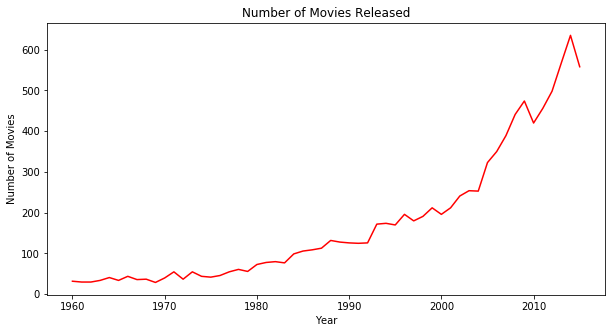

In [24]:
# Do some visualization to compare the number year per year

# Set x-axis and y-axis
x = movie_released.index
y = movie_released

# Plot line chart
plt.figure(figsize = (10,5))
plt.plot(x, y, color = 'red')
plt.title('Number of Movies Released')
plt.xlabel('Year')
plt.ylabel('Number of Movies');

From the line plot, it can be concluded that the number of movies released have been trending upwards from 1960 until 2015 with a really big jump between 2000 to 2010. According to my research, this accelerated growth can be due to increasing technology in film and more demand in movies as one of the top entertainment.

### 2. Which movie companies have been more successful in collecting revenues? 

In answering this question, I will compare each production company's revenue to determine whether a specific production company is more successful than others.

In [25]:
# Extract the top 10 Production Companies with the highest Total Adjusted Revenues
top_company = movie_data.groupby('production_company')['revenue_adj'].sum().sort_values(ascending = False).head(10)

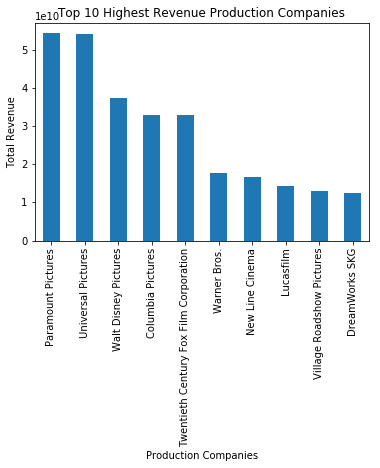

In [26]:
# Create a bar plot to visualize the top 10 production companies with highest total revenues
plot = top_company.plot(kind='bar', title='Top 10 Highest Revenue Production Companies')
plot.set_xlabel('Production Companies')
plot.set_ylabel('Total Revenue');

Based on the bar chart above, there are 5 productions companies that dominate the movie industry based on the highest adjusted revenues: Paramount Pictures, Universal Pictures, Walt Disney Pictures, Twentieth Century Fox, and Columbia Pictures. 

### 3. Which genres are more popular in the last 5 years and how do that compare to the 1960s?

In [27]:
# Create a list of the most popular movie genres in the last 5 years (2011 - 2015)
last_five = movie_data_split.query('release_year > 2010')
group_data = last_five.groupby(['genres'])['id'].count()
group_data.sort_values(ascending = False)

genres
Drama              1118
Thriller            778
Comedy              760
Action              538
Horror              465
Romance             311
Adventure           298
Science Fiction     290
Crime               270
Family              226
Animation           181
Documentary         179
Fantasy             172
Mystery             171
Music               105
History              57
War                  55
TV Movie             52
Western              20
Foreign              11
Name: id, dtype: int64

In [28]:
# Create a list of the most popular movie genres in Year 1960 - 1964
first_five = movie_data_split.query('release_year < 1964')
group_data = first_five.groupby(['genres'])['id'].count()
group_data.sort_values(ascending = False)

genres
Drama              61
Comedy             36
Romance            26
Action             25
Adventure          25
Horror             24
Thriller           23
History            15
Western            14
Family             12
Crime              11
Mystery            11
Science Fiction    10
War                 7
Fantasy             6
Foreign             5
Music               4
Animation           2
Name: id, dtype: int64

From the data above, the top 3 genres being produced in these last 5 years were Drama, Thriller, Comedy and the last 3 genres were TV Movie, Western, and Foreign. Genres Drama and Comedy were also included in the top 3 genres produced in 1960 - 1964, which suggested that these two genres were very popular since 50 years ago.

### 4. Does specific actor/actress contribute to more success?

Similar to Question 2, I will answer this question by comparing the revenues of the movies played by certain actor/actress, but this time I will create a proportion of revenue per the movies he or she starred in.

In [29]:
# Calculate the total revenue that each actor/actress get for all their movies
actor_revenue = movie_data.groupby('cast')['revenue_adj'].sum()
actor_revenue.sort_values(ascending = False).head(10)

cast
Tom Cruise               9.909573e+09
Tom Hanks                9.869998e+09
Harrison Ford            8.519046e+09
Daniel Radcliffe         8.483593e+09
Johnny Depp              6.938329e+09
Sylvester Stallone       6.404048e+09
Bruce Willis             6.312188e+09
Robert Downey Jr.        6.105985e+09
Sean Connery             6.045493e+09
Arnold Schwarzenegger    5.970958e+09
Name: revenue_adj, dtype: float64

In [30]:
# Calculate the total number of movie that each actor/actress get for all their movies
actor_movie = movie_data.groupby('cast')['revenue_adj'].count()
actor_movie.sort_values(ascending = False).head(10)

cast
Nicolas Cage             39
Robert De Niro           35
Bruce Willis             34
Johnny Depp              32
Sylvester Stallone       32
Denzel Washington        30
Tom Hanks                30
Tom Cruise               28
Clint Eastwood           27
Arnold Schwarzenegger    26
Name: revenue_adj, dtype: int64

In [31]:
# Divide the revenue and the number of movies for each actor/actress
actor_proportion = actor_revenue/actor_movie
top_actor = actor_proportion.sort_values(ascending = False).head(10)
top_actor

cast
Mark Hamill               1.822719e+09
Henry Thomas              1.791694e+09
Rod Taylor                1.574815e+09
Jonathan Taylor Thomas    1.159592e+09
Chris Pratt               1.052369e+09
William Moseley           8.360904e+08
Phil Harris               8.291219e+08
Amy Poehler               7.854116e+08
Scott Weinger             7.833063e+08
Omar Sharif               7.731786e+08
Name: revenue_adj, dtype: float64

In [32]:
# Observe the movies that Mark Hamill (the top actor with highest revenue per movie) starred in
movie_data.query('cast == "Mark Hamill"')

,id,popularity,original_title,cast,director,runtime,genres,production_company,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month
258,353595,0.477840,LEGO DC Comics Super Heroes: Justice League: A...,Mark Hamill,Rick Morales,67,Action|Adventure|Animation|Family,Warner Bros. Animation,8/25/15,17,6.8,2015,0.000000e+00,NaN,8
1329,11,12.037933,Star Wars,Mark Hamill,George Lucas,121,Adventure|Action|Science Fiction,Lucasfilm,3/20/77,4428,7.9,1977,3.957559e+07,2.789712e+09,3
7309,1891,5.488441,The Empire Strikes Back,Mark Hamill,Irvin Kershner,124,Adventure|Action|Science Fiction,Lucasfilm,1/1/80,3954,8.0,1980,4.762866e+07,1.424626e+09,1
7987,1892,4.828854,Return of the Jedi,Mark Hamill,Richard Marquand,135,Adventure|Action|Science Fiction,Lucasfilm,5/23/83,3101,7.8,1983,7.082424e+07,1.253819e+09,5


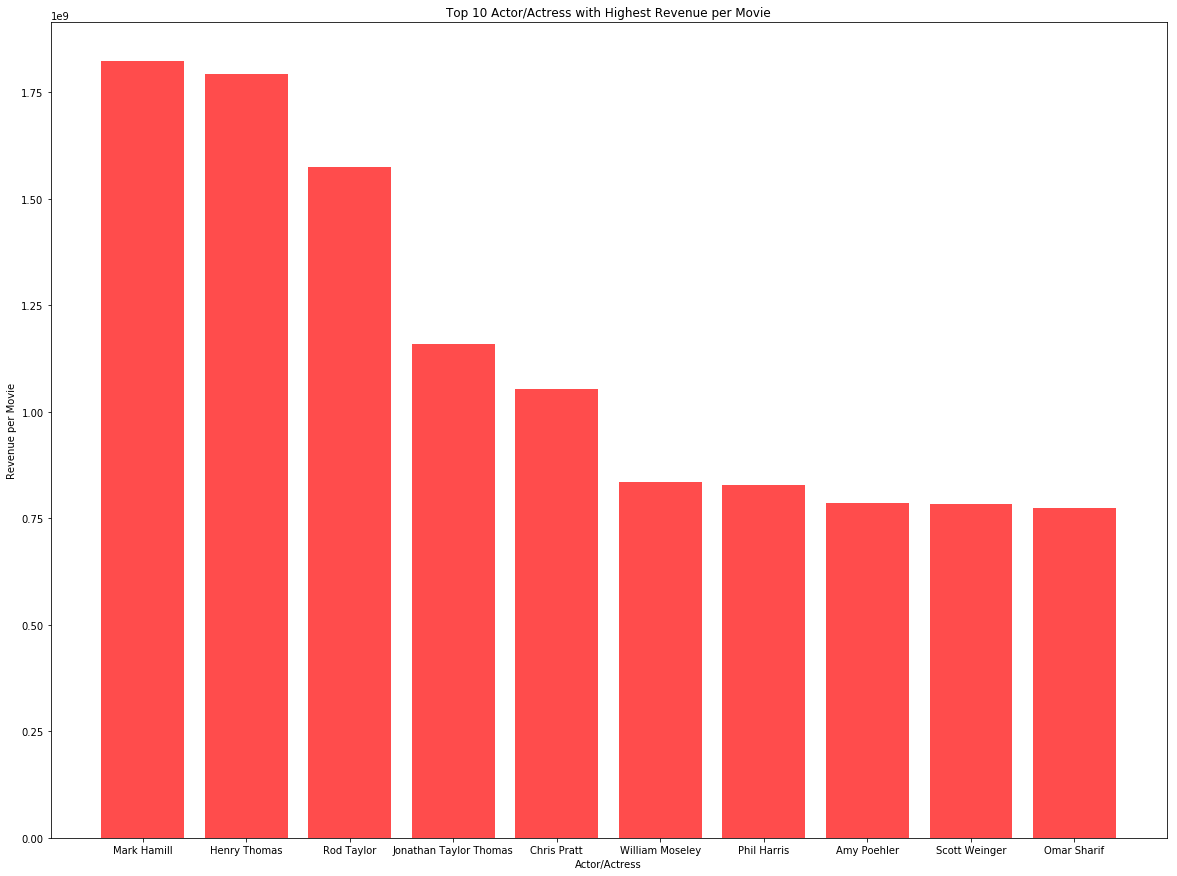

In [33]:
# Plot the bar chart visualizing the top 10 actors/actresses that have the highest revenue per movie
plt.subplots(figsize=(20, 15))
ind = np.arange(len(top_actor)) 
plot_actor = plt.bar(ind, top_actor, color='r', alpha=.7, tick_label = top_actor.index)
plt.ylabel('Revenue per Movie')
plt.xlabel('Actor/Actress')
plt.title('Top 10 Actor/Actress with Highest Revenue per Movie');

The result is very interesting because the top 10 actors/actresses that have the highest revenue and most movies produced didn't make it to the highest revenue per movie. The other actors/actresses in the highest revenue/movie list must have produced high revenues for EACH movie they starred in.

Mark Hamill, although he only starred in 4 movies, has the largest revenue per movie among all others. Three of the four movies, were the Star Wars series, which are legendary and have lots of fans even until now. 

### 5. Does the release month affect the popularity of the movie?

In [34]:
# Group the total revenue data based on the release month
movie_month = movie_data.groupby('release_month')['revenue_adj'].sum()
movie_month

release_month
1     1.734580e+10
2     2.344856e+10
3     4.060892e+10
4     3.163203e+10
5     6.166758e+10
6     8.068578e+10
7     5.849903e+10
8     3.248540e+10
9     3.087393e+10
10    3.837981e+10
11    5.848813e+10
12    8.340784e+10
Name: revenue_adj, dtype: float64

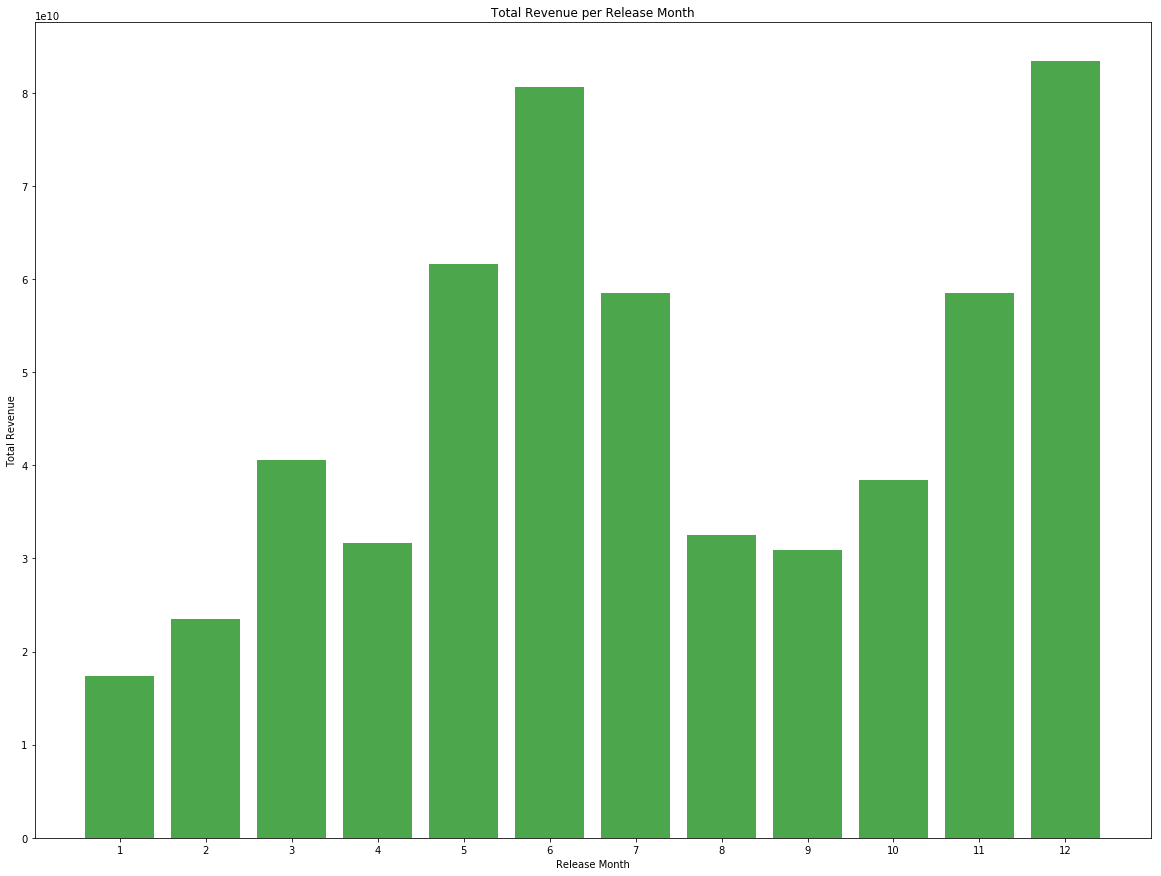

In [35]:
# Plot a bar chart to see which month grabs the most revenue
plt.subplots(figsize=(20, 15))
ind = np.arange(len(movie_month)) 
plt.bar(ind, movie_month, color='green', alpha=.7, tick_label = movie_month.index)
plt.ylabel('Total Revenue')
plt.xlabel('Release Month')
plt.title('Total Revenue per Release Month');

As I suspected, the release months that have the most total revenues are May - July and November - December. Many box office movies are released in these months because of the Summer Holiday and Winter Holiday, thus movie-goers tend to have more time to watch movies during those breaks. 

<a id='conclusions'></a>
## Conclusions

> Based on the analysis I have done in this project, I am able to derive some conclusions about the trends in movie industry:
> 1. The number of movies released are growing from 1960 to 2015, especially since Year 2000 due to increasing technology in film-making and more access to watch movies thus increase in demand, too.
> 2. There are 5 production companies that have been producing the most total revenues: Paramount Pictures, Universal Pictures, Walt Disney Pictures, Twentieth Century Fox, and Columbia Pictures.
> 3. Movies with genres Drama and Comedy have been popular in the last 5 years and also in the 1960s. 
> 4. Actor Mark Hamill (played in the Star Wars series) has the highest revenue per movie among other actors and actresses. 
> 5. The months during Summer holiday (May - July) and Winter holiday (November - December) produce the highest total revenues for movies released.

## Limitations

> 1. There are lots of zero values in the adjusted revenue columns (5000+ rows) and I replaced these zero values with null. These rows with zero values might actually affect the analysis.
> 2. In doing the analysis on the genres, I separated the genres column into multiple rows with 1 genre only. The combinations of different genres might affect the movie popularity rather than just individual genre.
> 3. I assumed that the adjusted revenue column is all in US dollars unit.

In [36]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0